作者: 阿凯爱玩机器人 | 微信: xingshunkai  | QQ: 244561792

[B站](https://space.bilibili.com/40344504) | [淘宝店铺](https://shop140985627.taobao.com) | [购买链接](https://item.taobao.com/item.htm?id=677075846402)
## 导入依赖

In [1]:
import time
import numpy as np
import cv2
from matplotlib import pyplot as plt
# 阿凯机器人工具箱
from kyle_robot_toolbox.camera import Gemini335
from kyle_robot_toolbox.opencv import ArucoTag

%matplotlib inline

pybullet build time: Jun  3 2022 02:05:55
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/robot_arm/fr5/fr5_kinematic_func.py:14: NumbaPendingDeprecationWarning: The 'pycc' module is pending deprecation. Replacement technology is being developed.

Pending Deprecation in Numba 0.57.0. For more information please see: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-the-numba-pycc-module
  from numba.pycc import CC


[ERROR] 导入法奥FR5真机模块失败
/home/kyle/Software/FR/frrpc.so: undefined symbol: _Py_CheckRecursionLimit
[ERROR] 导入FR5真机模块失败
cannot import name 'FR5' from 'kyle_robot_toolbox.robot_arm.fr5' (/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/robot_arm/fr5/__init__.py)
[ERROR] 导入法奥FR3真机模块失败
/home/kyle/Software/FR/frrpc.so: undefined symbol: _Py_CheckRecursionLimit
[ERROR] 导入FR3真机模块失败
cannot import name 'FR3' from 'kyle_robot_toolbox.robot_arm.fr3' (/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/robot_arm/fr3/__init__.py)


查看opencv版本

In [17]:
cv2.__version__

'4.8.1'

## 相机初始化

In [2]:
# 创建相机对象
camera = Gemini335()

[2023-12-25 15:46:57.842937][info][17646][Context.cpp:66] Context created with config: default config!
[2023-12-25 15:46:57.923160][info][17646][DeviceManager.cpp:562] Found 1 device(s):
[2023-12-25 15:46:57.923168][info][17646][DeviceManager.cpp:564]   - Name: Gemini335, PID: 0x0670, SN/ID: AY3A131006E
[2023-12-25 15:46:57.923229][info][17646][LinuxPal.cpp:109] Create PollingDeviceWatcher!


## 创建ArucoTag检测器

In [4]:
# 创建ArucoTag检测器
arucotag = ArucoTag(camera, \
    config_path="config/arucotag/arucotag.yaml")

## 采集图像

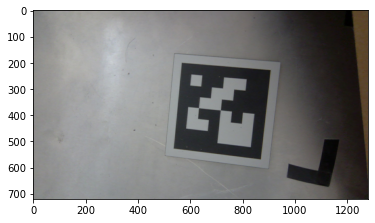

In [6]:
# 采集图像
img_bgr = camera.read_color_img()
# 图像移除畸变
img_bgr = camera.remove_distortion(img_bgr)
# 图像可视化
plt.imshow(img_bgr[:, :, ::-1])

In [7]:
# cv2.imwrite("img_bgr.png", img_bgr)

## 图像预处理

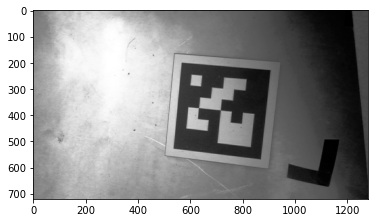

In [8]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# 直方图均衡
img_gray = cv2.equalizeHist(img_gray)
plt.imshow(img_gray, cmap="gray")

In [7]:
# cv2.imwrite("img_gray_equalhist.png", img_gray)

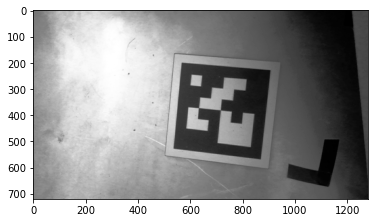

In [9]:
# 中值滤波
img_gray = cv2.medianBlur(img_gray, 3)
plt.imshow(img_gray, cmap="gray")

In [9]:
# cv2.imwrite("img_gray_medianblur.png", img_gray)

## ArucoTag检测

In [10]:
img_filter = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
# 检测ArucoTag
has_aruco, canvas, aruco_ids, aruco_centers, corners, T_cam2aruco = \
    arucotag.aruco_pose_estimate(img_filter)

In [11]:
print(f"画面中是否存在ArucoTag: {has_aruco}")

画面中是否存在ArucoTag: True


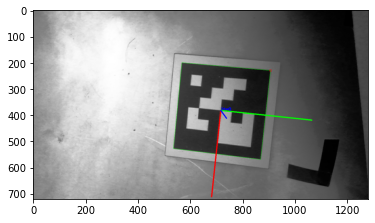

In [12]:
# 展示画布
plt.imshow(canvas[:, :, ::-1])

In [15]:
# cv2.imwrite("canvas.png", canvas)

In [13]:
print("检测到的ArucoTag ID")
print(aruco_ids)

检测到的ArucoTag ID
[0]


In [14]:
print("ArucoTag 像素中心点坐标")
print(aruco_centers)

ArucoTag 像素中心点坐标
[[717 382]]


In [15]:
print("ArucoTag在相机坐标系下的位姿")
print(T_cam2aruco)

ArucoTag在相机坐标系下的位姿
[[[ -0.103   0.992  -0.079  23.227]
  [  0.994   0.105   0.014   6.536]
  [  0.022  -0.077  -0.997 205.947]
  [  0.      0.      0.      1.   ]]]


'4.8.1'